In [ ]:
import torch
import matplotlib.pyplot as plt
import torch
from matplotlib.ticker import MaxNLocator
import numpy as np

In [2]:
data_type = 'llm'


if(data_type=='twitter'):
    emotions_list = ["anger", "love","fear", "joy","sadness", "surprise"]
elif(data_type=='crowd'):
    emotions_list = ['anger','disgust', 'fear', 'joy', 'sadness', 'surprise']
elif(data_type=='crowd-h'):
    emotions_list = ['anger','disgust', 'fear', 'joy', 'sadness', 'surprise']
elif(data_type=='llm'):
    emotions_list = ['anger','disgust','fear','happiness','sadness','surprise']
elif(data_type=='dialogue'):
    emotions_list = ['anger','disgust', 'fear', 'joy', 'sadness', 'surprise']

In [28]:
full_neurons = {}
# full_neurons_raw = {}

for data_type in ['twitter', 'crowd-h', 'crowd', 'llm', 'dialogue']:
    
    # neurons = torch.load(f"activation_mask/{data_type}_llama-8b", weights_only= False)
    # neurons = torch.load(f"activation_mask/llama_inst/{data_type}_llama-8b", weights_only= False)
    neurons = torch.load(f"activation_mask/gemma_inst/{data_type}_gemma-9b", weights_only= False)
    print(data_type, neurons[1][0])
    # full_neurons_raw[data_type] = neurons
    full_neurons[data_type] = neurons
    # print(full_neurons[data_type])


twitter tensor([  329,  1497,  1955,  2963,  3070,  3587,  3784,  4525,  5853,  6142,
         6244,  7789,  7791,  8294,  8676,  8769,  8881,  8960,  8985,  9349,
         9701, 10111, 10183, 11243, 11843, 12641, 12667, 12677, 13208, 13332,
        13353, 13501])
crowd-h tensor([ 1288,  1497,  1817,  2890,  3956,  4332,  5044,  5853,  6344,  6746,
         6914,  7404,  7494,  7539,  7791,  8652,  8676,  8769,  8881,  9857,
         9888, 10183, 10512, 11171, 11843, 12274, 12667, 12739, 14321])
crowd tensor([ 1288,  1497,  1817,  3956,  4332,  5044,  5853,  6344,  6746,  6914,
         7377,  7404,  7494,  7539,  7791,  8497,  8676,  8769,  8881,  9857,
         9888, 10183, 10512, 11843, 12274, 12667, 12739, 13297, 14321])
llm tensor([ 1187,  1231,  2890,  3404,  3587,  3956,  4525,  5044,  5233,  5853,
         5858,  6142,  6746,  6914,  7483,  8224,  8294,  8391,  8497,  8749,
         9427,  9446, 10512, 11724, 12667, 13375])
dialogue tensor([   45,    69,   156,   416,   604,   

In [10]:
def torch_intersect(t1, t2):
    # Find elements in t1 that are also in t2
    # .unique() ensures we behave like a set (no duplicates)
    return t1[torch.isin(t1, t2)].unique()

In [29]:
from functools import reduce
# common_neurons_raw = {}
common_neurons = {}
# common_neurons_ids_raw = {}
common_neurons_ids = {}

emo_twitter  = {'anger':0, 'fear':2, 'joy':3, 'sadness':4, 'surprise':5}
for ei,emo in enumerate(['anger','disgust', 'fear', 'joy', 'sadness', 'surprise']):
    # common_neurons_raw[emo] = []
    common_neurons[emo] = []
    data_current = {}
    if(emo=='disgust'):
        datasets = ['crowd-h', 'crowd', 'dialogue','llm']
    else:
        datasets = ['crowd-h', 'crowd', 'dialogue','llm', 'twitter']
    
    print("Emotion: ", emo)
    for data_type_ in datasets:
        if(data_type_ == 'twitter'):
            ei = emo_twitter[emo]
        # data_current[data_type_] = full_neurons_raw[data_type_][ei]
        data_current[data_type_] = full_neurons[data_type_][ei]

    common_neurons_per_layer = []

    for layer_tensors in zip(*data_current.values()):
        # Apply the corrected intersection function across all datasets in this layer
        intersection = reduce(torch_intersect, layer_tensors)
        common_neurons_per_layer.append(intersection)

    # Output
    # common_neurons_raw[emo] = [len(i) for i in common_neurons_per_layer]
    common_neurons[emo] = [len(i) for i in common_neurons_per_layer]
    common_neurons_ids[emo] = common_neurons_per_layer
    # common_neurons_ids_raw[emo] = common_neurons_per_layer
    # for i, neurons in enumerate(common_neurons_per_layer):
    #     print(f"Layer {i}: {len(neurons)},{neurons.tolist()}")
    # print("_____________________________________________")
    
# print(common_neurons_raw)
print(common_neurons)

Emotion:  anger
Emotion:  disgust
Emotion:  fear
Emotion:  joy
Emotion:  sadness
Emotion:  surprise
{'anger': [1, 2, 0, 0, 2, 4, 2, 2, 1, 2, 3, 3, 2, 3, 3, 2, 3, 6, 6, 6, 7, 2, 8, 2, 2, 3, 4, 2, 1, 4, 0, 0, 1, 0, 1, 0, 0, 1, 0, 4, 0, 9], 'disgust': [1, 0, 0, 0, 2, 4, 0, 2, 4, 4, 5, 3, 4, 6, 7, 6, 2, 9, 7, 4, 9, 4, 7, 4, 3, 4, 6, 2, 2, 2, 1, 1, 2, 0, 1, 0, 1, 3, 2, 5, 5, 19], 'fear': [1, 0, 0, 0, 2, 2, 1, 1, 0, 3, 4, 2, 2, 3, 3, 1, 2, 5, 3, 7, 6, 3, 5, 1, 1, 2, 2, 4, 1, 3, 0, 0, 1, 0, 1, 0, 0, 1, 0, 2, 1, 11], 'joy': [0, 3, 0, 0, 1, 3, 1, 1, 1, 2, 5, 3, 3, 4, 2, 0, 4, 9, 2, 8, 6, 4, 5, 1, 1, 2, 3, 4, 0, 4, 0, 1, 1, 0, 1, 0, 0, 1, 2, 5, 1, 14], 'sadness': [0, 3, 0, 0, 1, 2, 4, 1, 1, 3, 4, 3, 2, 2, 3, 3, 4, 6, 4, 7, 6, 2, 6, 2, 2, 2, 3, 2, 2, 4, 0, 0, 1, 0, 1, 0, 0, 1, 1, 4, 1, 11], 'surprise': [0, 2, 0, 0, 1, 3, 0, 1, 2, 2, 4, 2, 2, 2, 2, 0, 2, 6, 3, 5, 5, 4, 5, 2, 1, 2, 3, 3, 1, 4, 0, 0, 1, 0, 1, 0, 0, 1, 1, 4, 0, 12]}


In [12]:
emotion_to_color = {"happiness": "#1f77b4", "joy": "#1f77b4","sadness":"#ff7f0e" , "anger": "#2ca02c", "fear": "#d62728", "disgust": "#9467bd", "surprise": "#8c564b" }

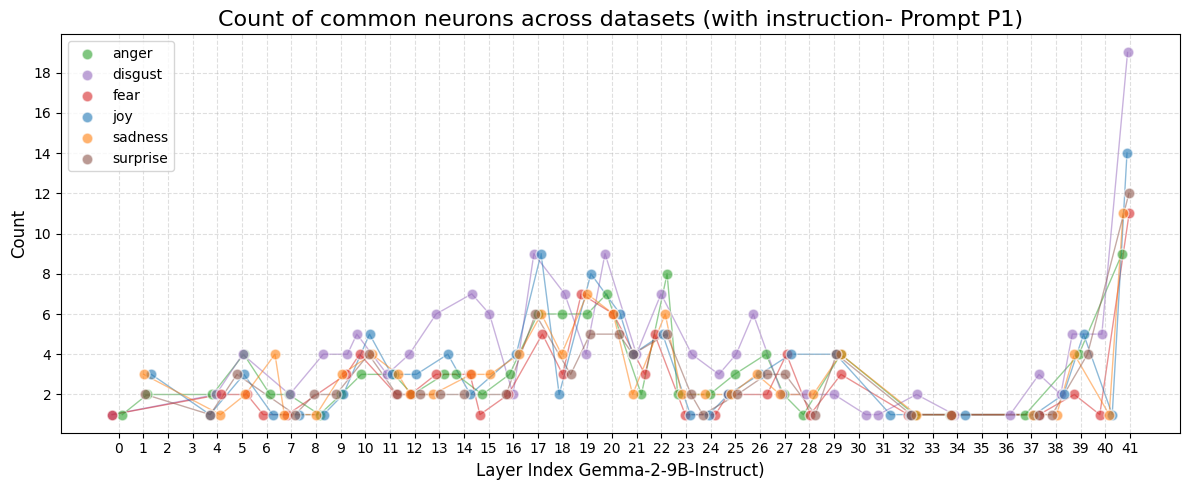

In [ ]:
lang_colors = emotion_to_color

counts_data = common_neurons

plt.figure(figsize=(12, 5))

JITTER_WIDTH = 0.35 

for i, (language, counts) in enumerate(counts_data.items()):
    color = lang_colors.get(language, "gray")
    
    # 1. Ensure Numpy Array
    if isinstance(counts, list):
        counts = np.array(counts)
    elif hasattr(counts, 'cpu'):
        counts = counts.cpu().numpy()
        
    # 2. Base X-Axis
    x_base = np.arange(len(counts))
    
    # 3. Filter Zeros
    mask = counts > 0
    counts_filtered = counts[mask]
    x_filtered = x_base[mask]
    
    # 4. Apply Jitter
    if len(x_filtered) > 0:
        noise = np.random.uniform(low=-JITTER_WIDTH, high=JITTER_WIDTH, size=len(x_filtered))
        x_jittered = x_filtered + noise
        
        # --- NEW: Add the Faint Connecting Line ---
        plt.plot(
            x_jittered, 
            counts_filtered, 
            color=color, 
            alpha=0.5,       # <--- Low alpha makes it faint
            linewidth=1,     # <--- Thin line
            linestyle='-',
            zorder=1         # <--- 1 draws it BEHIND the dots
        )
        
        # --- Plot the Dots ---
        plt.scatter(
            x_jittered, 
            counts_filtered, 
            label=language, 
            color=color, 
            s=60,
            alpha=0.6,
            edgecolors='white',
            zorder=2         # <--- 2 draws them ON TOP of the line
        )


plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
plt.xticks(range(len(counts_data["joy"]))) 

plt.grid(True, linestyle='--', alpha=0.4)
plt.title("Count of common neurons across datasets (with instruction- Prompt P1)", fontsize=16)
plt.xlabel("Layer Index Gemma-2-9B-Instruct)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('plots/common_gemma9b_P1.pdf', format='pdf', dpi=500, bbox_inches='tight')
plt.show()

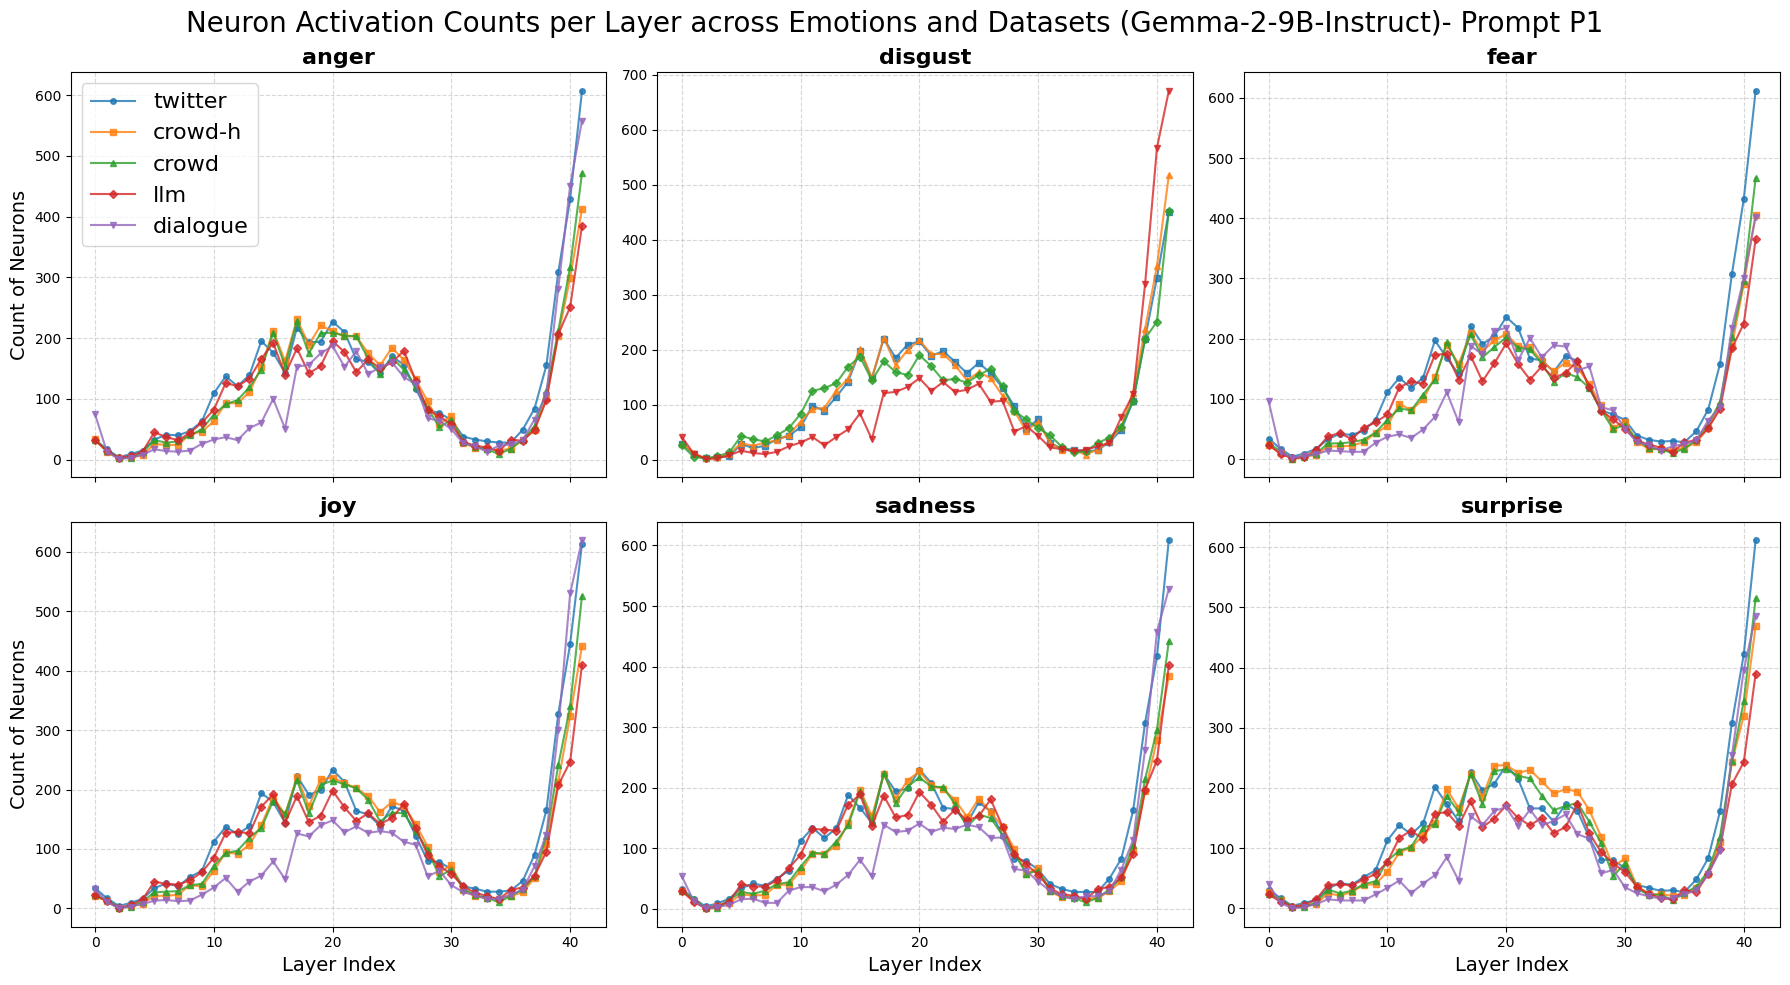

In [ ]:
# Load mock data
data_dict = full_neurons

NUM_LANGS = 6
NUM_LAYERS = 32

lang_names = ['anger','disgust', 'fear', 'joy', 'sadness', 'surprise']

emo_twitter  = {'anger':0, 'fear':2, 'joy':3, 'sadness':4, 'surprise':5}


# Create a 2x3 grid of subplots
# figsize is (width, height) in inches
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10), sharex=True)

# Flatten the 2D array of axes into a 1D array for easy iteration (0 to 5)
axes_flat = axes.flatten()

# Define markers and line styles for distinction
markers = ['o', 's', '^', 'D', 'v', '*']
linestyles = ['-', '--', '-.', ':', '-', '--']

# Iterate over each language (Subplot)
for lang_idx, lang in enumerate(lang_names):
    ax = axes_flat[lang_idx]
    plot_color = emotion_to_color.get(lang, "black")
    
    # Iterate over each dataset (Lines)
    for i, (dataset_name, nested_list) in enumerate(data_dict.items()):
        
        # 1. Extract the list of tensors for this specific language
        # nested_list structure is [lang][layer]
        if(dataset_name =='twitter' and lang=='disgust'):
            continue

        layers_data = nested_list[lang_idx]
        
        # 2. Calculate the count (len) for each layer
        # tensor.numel() is safer than len() for tensors, though len() works too
        y_values = [t.numel() for t in layers_data]
        x_values = range(len(y_values))
        
        # 3. Plot
        ax.plot(
            x_values, 
            y_values, 
            label=dataset_name,
            # color=plot_color,
            marker=markers[i % len(markers)], # Cycle markers if > 6 datasets
            markersize=4,
            alpha=0.8,
            linewidth=1.5
        )

    # Subplot Styling
    title = lang_names[lang_idx] if lang_idx < len(lang_names) else f"Language {lang_idx+1}"
    ax.set_title(title, fontsize=16, fontweight='bold')#, color=plot_color)
    ax.grid(True, linestyle='--', alpha=0.5)
    
    # Only set Y-label for the first column to keep it clean
    if lang_idx % 3 == 0:
        ax.set_ylabel("Count of Neurons", fontsize=14)
        
    # Only set X-label for the bottom row
    if lang_idx >= 3:
        ax.set_xlabel("Layer Index", fontsize=14)

# Add a single legend outside the plot (optional) or inside the first plot
# Here we add it to the first plot (top-left)
axes_flat[0].legend(fontsize=16, loc='upper left')

plt.suptitle("Neuron Activation Counts per Layer across Emotions and Datasets (Gemma-2-9B-Instruct)- Prompt P1", fontsize=20)
# plt.suptitle("Neuron Activation Counts per Layer across Emotions and Datasets (Llama-3.1-8B-Instruct)- Prompt P0", fontsize=20)
plt.tight_layout()
plt.savefig('plots/emotion_gemma9b_P1.pdf', format='pdf', dpi=500, bbox_inches='tight')
# plt.savefig('plots/emotion_llama8b_P0.pdf', format='pdf', dpi=500, bbox_inches='tight')

plt.show()